## Convolutional Neural Network
### Packages
Convolutional Assignment 1 Using Tensorflow <br>
These are libraries that we are going to use in this assignment not all few of them

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
# from cnn_utils import *
# from test_utils import summary, comparator


/home/hamza/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-09-24 10:46:18.281812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 10:46:18.305317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 10:46:18.312981: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 10:46:18.330815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary i

# Dataset

In this Assignment I am using happy house dataset <br>
first Load Dataset <br>
next Normalize Dataset or preprocess data for training.

In [2]:
def load_dataset(path_to_train):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])



    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))

    return train_x, train_y, train_dataset

In [3]:
train_path = "images/train_happy.h5"

train_x, train_y, train_dataset = load_dataset(train_path)

In [5]:
train_x = train_x/255

In [6]:
train_y = train_y.T

In [26]:
train_y[0]

array([0])

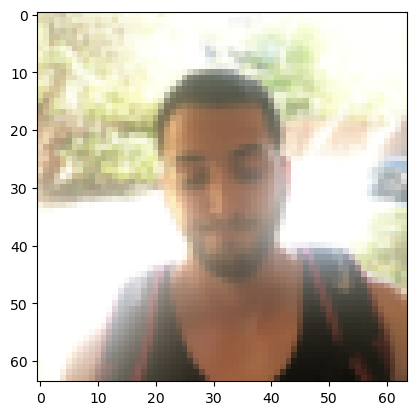

In [4]:
index = 124
plt.imshow(train_x[index])


# Neural Network
Create a method happyModel in which create keras Layers <br>
padding --> Conv2D --> BatchnNormalization --> ReLU --> MaxPooling --> FLATTEN --> DENSE <br>

padding = (3,3) <br>
Conv2D = 32 filters of 7x7 , strides 1x1 --> 1 step right to left and top to bottom movement.<br>
BatchNormalization = axis 1<br>
MaxPooling2D = 2x2 <br>
ReLU <br>
Dense Layer = 1 output, activation function for classify image

In [22]:
def happyModel():
    model = tf.keras.Sequential([
        tf.keras.layers.ZeroPadding2D(padding = (3,3), input_shape = (64, 64, 3), data_format = "channels_last"),
        tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name="conv0"),
        tf.keras.layers.BatchNormalization(axis = 1, name = "bn0"),
        tf.keras.layers.ReLU(max_value = None, negative_slope = 0, threshold = 0.0),
        tf.keras.layers.MaxPooling2D((2,2), name = "max_pool"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "fc")
    ])
    return model

In [23]:
model = happyModel()

In [25]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [27]:
model.fit(train_x, train_y, epochs = 10, batch_size = 16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.5470 - loss: 1.2208
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8419 - loss: 0.3768
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8769 - loss: 0.2849
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9251 - loss: 0.1826
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9493 - loss: 0.1493
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9552 - loss: 0.1188
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9632 - loss: 0.0952
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9532 - loss: 0.1258
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9625 - loss: 0.1277
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9612 - loss: 0.0816


In [32]:
def test_dataset(path_to_test):
    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])
    
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return test_x, test_y

In [33]:
test_path = "images/test_happy.h5"
x_test, y_test = test_dataset(test_path)

In [35]:
x_test = x_test/255

In [36]:
y_test = y_test.T

# Evaluation
evaluation of model on test dataset

In [37]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9414 - loss: 0.1558


[0.14246322214603424, 0.9466666579246521]

# Confusion Matrix